In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("F:\Data Science\Pandas Dataset\card_transdata.csv")
df.head()

<IPython.core.display.Javascript object>

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<Axes: xlabel='fraud', ylabel='count'>

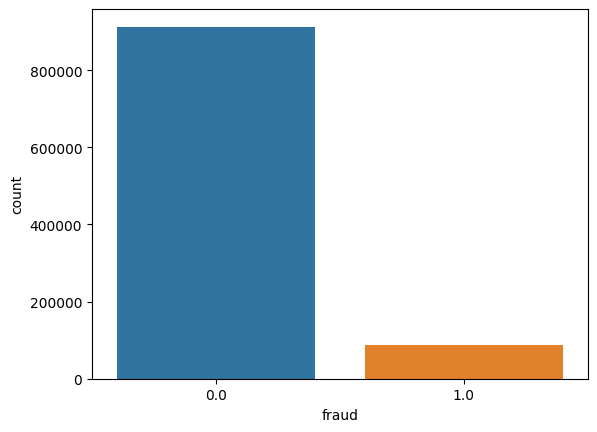

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["fraud"])

# Resample method
In this method, we seperate the dataset in two parts based on the minor and major value.
Then we use resample to upscale the minor value equal to major, or downscale major to minor.


## upsample

In [5]:
from sklearn.utils import resample

df_minority=df[df["fraud"]==1.0]
df_majority=df[df["fraud"]==0.0]

In [8]:
df_minority_resampled=resample(
    
    df_minority,replace=True,
    n_samples=len(df_majority),
    random_state=30
)

In [9]:
df_upsampled=pd.concat([df_minority_resampled,df_majority])

<IPython.core.display.Javascript object>

In [10]:
df_upsampled["fraud"].value_counts()

fraud
1.0    912597
0.0    912597
Name: count, dtype: int64

# smote method

In [11]:
df=pd.read_csv("F:\Data Science\Pandas Dataset\card_transdata.csv")
df.head()

<IPython.core.display.Javascript object>

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [12]:
df_minority=df[df["fraud"]==1.0]
df_majority=df[df["fraud"]==0.0]

### SMOTE OVER SAMPLE OR MODIFY DATA IN THE TRAINING SET

In [15]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=1)

In [16]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.7)

In [22]:
y_train.value_counts()

fraud
0.0    638638
1.0     61362
Name: count, dtype: int64

In [23]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train_smote.value_counts()

fraud
1.0    638638
0.0    638638
Name: count, dtype: int64

In [24]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [26]:
y_predict=random_forest.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict,y_test)

0.9999966666666666